In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv('cleaned Churn History Dataset.csv')
test=pd.read_csv('Churn Test Dataset.csv')

In [3]:
train.head()

,Unnamed: 0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Y_var
0,0,KS,128,415,382-4657,no,yes,25,265.1,110.0,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123.0,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114.0,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False.
3,4,OK,75,415,330-6626,yes,no,0,166.7,113.0,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False.
4,5,AL,118,510,391-8027,yes,no,0,223.4,98.0,...,101,18.75,203.9,118.0,9.18,6.3,6,1.70,0,True.


In [4]:
mapping={" False.":0," True.":1}
train["y"]=train["Y_var"].map(mapping)
test["y"]=test["Churn Indicator"].map(mapping)

In [5]:
train.head()

,Unnamed: 0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Y_var,y
0,0,KS,128,415,382-4657,no,yes,25,265.1,110.0,...,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False.,0
1,1,OH,107,415,371-7191,no,yes,26,161.6,123.0,...,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False.,0
2,2,NJ,137,415,358-1921,no,no,0,243.4,114.0,...,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False.,0
3,4,OK,75,415,330-6626,yes,no,0,166.7,113.0,...,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False.,0
4,5,AL,118,510,391-8027,yes,no,0,223.4,98.0,...,18.75,203.9,118.0,9.18,6.3,6,1.70,0,True.,1


In [6]:
train.drop(['Unnamed: 0','Y_var'],inplace=True,axis=1)
test.drop(['Churn Indicator'],inplace=True,axis=1)

In [7]:
test.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,y
0,HI,101,510,354-8814,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,MT,137,510,381-7210,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,OH,103,408,411-9480,yes,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,NM,99,415,418-9103,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,SC,108,415,413-3646,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


<h2> Feature Selection <h2>

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

In [9]:
corr=train.corr()

In [10]:
mask=np.triu(np.ones_like(corr,dtype=bool))

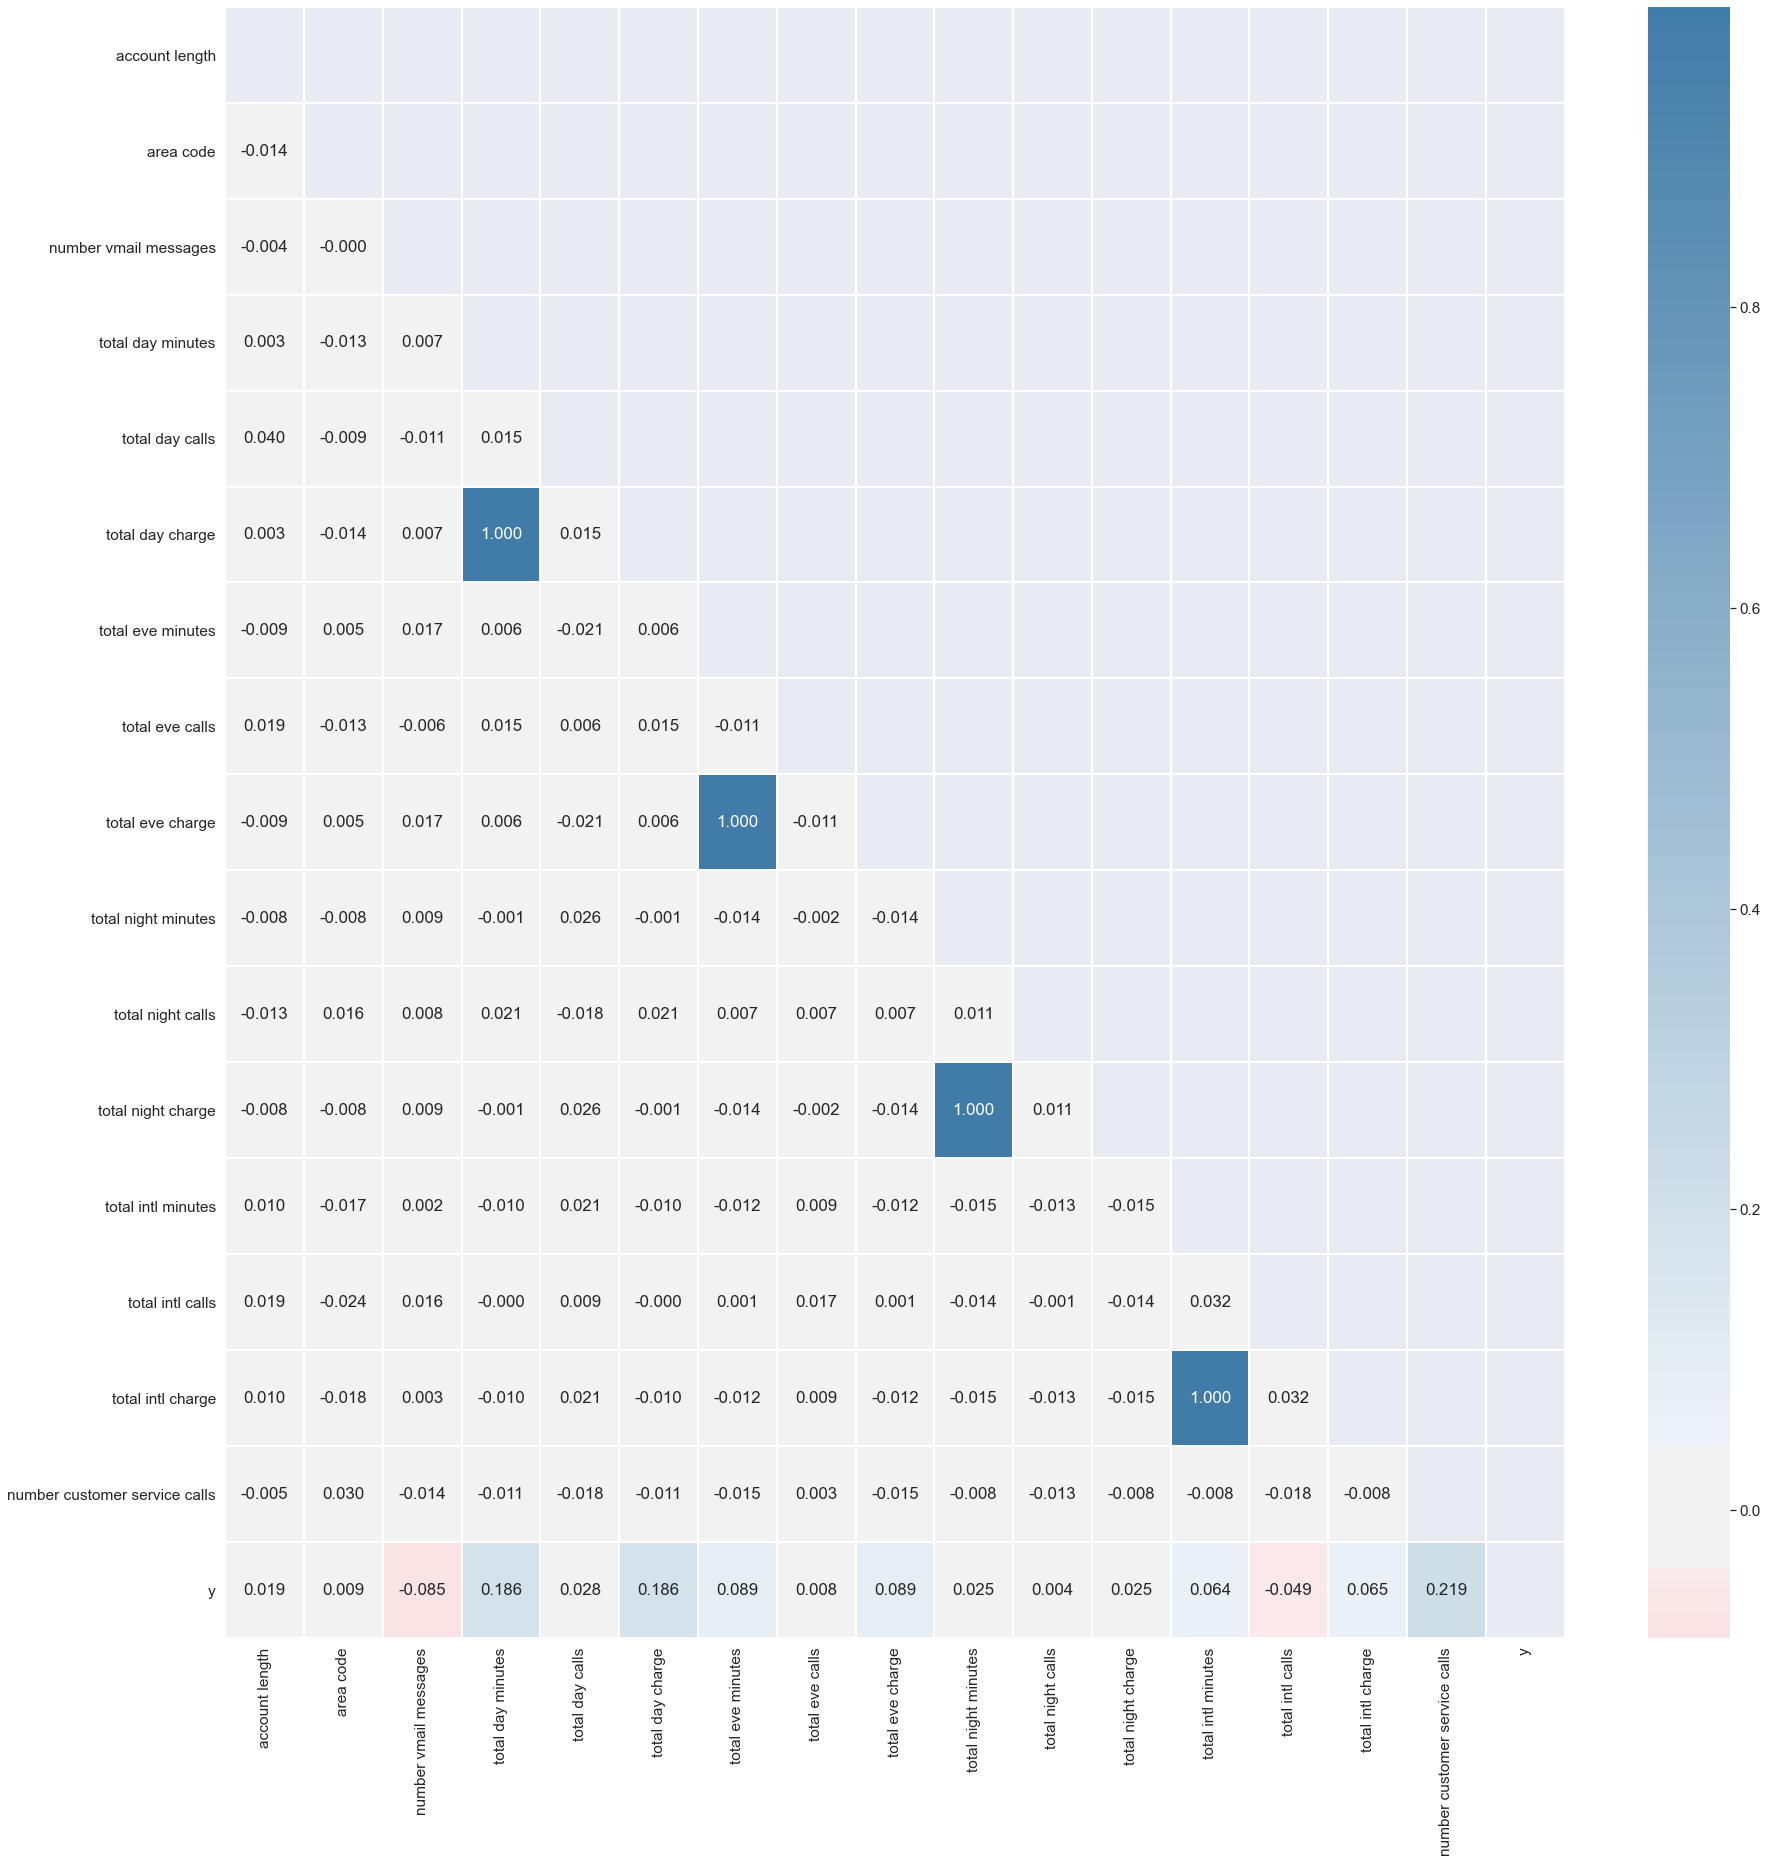

In [11]:
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
plt.figure(figsize=(30,30))
sns.set(font_scale=1.4)
sns.heatmap(corr,mask=mask,center=0,cmap=cmap,linewidths=1,annot=True,fmt=".3f",)

In [12]:
#create positive correlation matrix
pos_corr=train.corr().abs()
#create and apply mask
mask=np.triu(np.ones_like(pos_corr,dtype=bool))
#reason of using mask fature is that to avoid dropping both highly correlated feature. we will drop only one feature among two highly correlated feature
tri_df=pos_corr.mask(mask)

In [13]:
#select the feature having correlation >0.95 or less than -0.95 for dropping 
drop=[c for c in tri_df.columns if any(tri_df[c]>0.95)]

In [14]:
drop

['total day minutes',
 'total eve minutes',
 'total night minutes',
 'total intl minutes']

In [15]:
data=train[[col for col in train.columns if col not in drop]]
test=test[[col for col in test.columns if col not in drop]]

In [16]:
#function for converting categoric to num codes
def cat_to_num(df):
    for i in range(0, df.shape[1]):
        #print(i)
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
    return df

In [17]:

data = cat_to_num(data)
test = cat_to_num(test)

C:\Users\RN7\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,y
0,16,128,415,1914,0,1,25,110.0,45.07,99,16.78,91.0,11.01,3,2.70,1,0
1,35,107,415,1567,0,1,26,123.0,27.47,103,16.62,103.0,11.45,3,3.70,1,0
2,31,137,415,1110,0,0,0,114.0,41.38,110,10.30,104.0,7.32,5,3.29,0,0
3,36,75,415,109,1,0,0,113.0,28.34,122,12.61,121.0,8.41,3,2.73,3,0
4,1,118,510,2241,1,0,0,98.0,37.98,101,18.75,118.0,9.18,6,1.70,0,1


### Chi-Square Test to find significant Categorical features

In [19]:
#checking Relation b/w categorical variables with respect to target var
#Null hypothesis:Features are independent
#Alternate Hypothesis:Features are not independent
#If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
#If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

#If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
#If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent

# If we reject null hypothesis
ind_col=["area code","state","international plan","voice mail plan","phone number","number customer service calls"]
def test_chi2_significance(col,data,alpha=0.05):
    from scipy.stats import chi2_contingency
    for col in col:
        chi2, p, dof, ex =chi2_contingency(pd.crosstab(data['y'],data[col]))
        print(col)
        print('*'*50)
        print("P-value:{}".format(p))
        if p <= alpha:
            print('Dependent (reject H0)')
        else:
            print('Independent (fail to reject H0)')
        print('\n')    
        #as above pd.crosstab(dependent variable , independent variable)

In [20]:
test_chi2_significance(ind_col,data)

area code
**************************************************
P-value:0.7758990931884302
Independent (fail to reject H0)


state
**************************************************
P-value:0.00718456379708033
Dependent (reject H0)


international plan
**************************************************
P-value:9.596429766663652e-72
Dependent (reject H0)


voice mail plan
**************************************************
P-value:2.703492650894687e-08
Dependent (reject H0)


phone number
**************************************************
P-value:0.4918376962261161
Independent (fail to reject H0)


number customer service calls
**************************************************
P-value:9.955369217191537e-70
Dependent (reject H0)




<b> Remove area code and phone number features.Since they are independent to our Predictor variable </b

In [21]:
data=data.drop(["area code","phone number"],axis=1)
test=test.drop(["area code","phone number"],axis=1)

In [22]:
data.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,y
0,16,128,0,1,25,110.0,45.07,99,16.78,91.0,11.01,3,2.70,1,0
1,35,107,0,1,26,123.0,27.47,103,16.62,103.0,11.45,3,3.70,1,0
2,31,137,0,0,0,114.0,41.38,110,10.30,104.0,7.32,5,3.29,0,0
3,36,75,1,0,0,113.0,28.34,122,12.61,121.0,8.41,3,2.73,3,0
4,1,118,1,0,0,98.0,37.98,101,18.75,118.0,9.18,6,1.70,0,1


### Numerical Feature Selection

In [23]:
def select_features(X_train, y_train, data):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif
    from matplotlib import pyplot
   # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(data[X_train], data[y_train])
    p_value = -np.log10(fs.pvalues_)
    p_value /=p_value.max()
   # learn relationship from training data
    for i in range(len(fs.scores_)):
	    print(' %s: %f , %f' % (X_train[i], fs.scores_[i],p_value[i]))
   # plot the scores
    pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
    pyplot.show()
    

 account length: 1.206811 , 0.015512
 number vmail messages: 24.096695 , 0.165103
 total day calls: 2.561302 , 0.026344
 total day charge: 119.207322 , 0.728815
 total eve calls: 0.193248 , 0.004947
 total eve charge: 26.237937 , 0.178234
 total night calls: 0.045253 , 0.002198
 total night charge: 2.065709 , 0.022547
 total intl calls: 7.915729 , 0.063302
 total intl charge: 13.855506 , 0.101447
 number customer service calls: 166.354984 , 1.000000


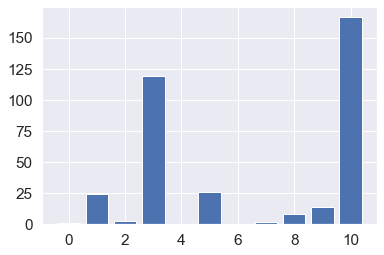

In [24]:
col=['account length','number vmail messages','total day calls','total day charge','total eve calls','total eve charge','total night calls','total night charge','total intl calls','total intl charge','number customer service calls']
select_features(col,"y",data)

In [25]:
trial=data.copy()
trial_test=test.copy()
data=data.drop(["account length","total eve calls","total day calls","total night calls"],axis=1)
test=test.drop(["account length","total eve calls","total day calls","total night calls"],axis=1)

In [26]:
#data["total charge"]=3*data["total day charge"]+1.5*data["total eve charge"]+data["total night charge"]

In [27]:
#data.head()

In [28]:
#test["total charge"]=3*test["total day charge"]+1.5*test["total eve charge"]+test["total night charge"]

In [29]:
X_train=data.drop("y",axis=1)
y_train=data["y"]
X_test=test.drop("y",axis=1)
y_test=test["y"]

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [62]:
X=trial.drop("y",axis=1)
y=trial["y"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X,y=smote.fit_resample(X,y)

>2 0.697 (0.015)
>3 0.752 (0.014)
>4 0.762 (0.015)
>5 0.762 (0.015)
>6 0.775 (0.018)
>7 0.776 (0.017)
>8 0.777 (0.017)
>9 0.776 (0.017)
>10 0.775 (0.017)
>11 0.776 (0.016)
>12 0.776 (0.016)
>13 0.778 (0.017)
>14 0.779 (0.017)


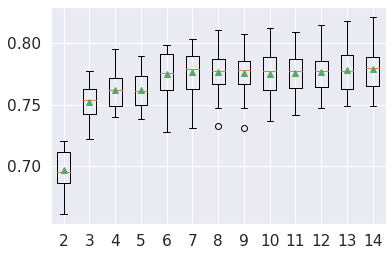

In [65]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator=LogisticRegression(), n_features_to_select=i)
		model = LogisticRegression()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<h2> Modelling <h2>

In [30]:
labels=['Retained','Churn']

In [31]:
#Function to plot confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
def print_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))
    

In [33]:
#function to draw roc_auc_curve
def curve(test,prediction):
    from sklearn.metrics import roc_curve,auc
    fpr, tpr, thresholds = roc_curve(test, prediction)
    auc_ = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=' (area = {:.3f})'.format(auc_))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [34]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    from sklearn import metrics
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   
    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    # calculate overall F1-score of the model
    f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['f1-score'] = f1_score
    print('---------------------')
    print('|      F1_score      |')
    print('---------------------')
    print('\n    {}\n\n'.format(f1_score))
    
    print('---------------------')
    print('|      Recall Score     |')
    print('---------------------')
    print('\n    {}\n\n'.format(metrics.recall_score(y_true=y_test, y_pred=y_pred)))
    
    curve(y_test,y_pred)
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    print_search_attributes(model)
    
    results['cv_result']=pd.DataFrame(model.cv_results_)
    
    return results,y_pred,y_test
    
    

#### Here we want to predict churn customer as much as possible .So we want to minimize error in predicting customer as a retained while it actually churned.So we are more focused on False Negative.We ant to minimize False Negative prediction ,Hence want to maximize Recall Score

## Logistic Regression

In [35]:
from sklearn import linear_model
#from sklearn.metrics import r

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

training the model..
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   23.2s finished
C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:25.712205


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.001875


---------------------
|      Accuracy      |
---------------------

    0.861244019138756


---------------------
|      F1_score      |
---------------------

    0.27950310559006214


---------------------
|      Recall Score     |
---------------------

    0.1875




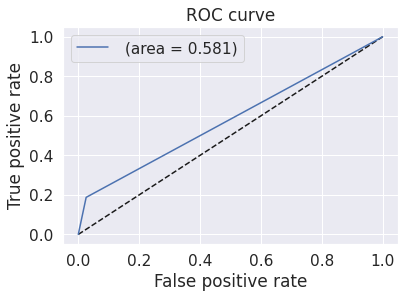

--------------------
| Confusion Matrix |
--------------------

 [[1395   37]
 [ 195   45]]


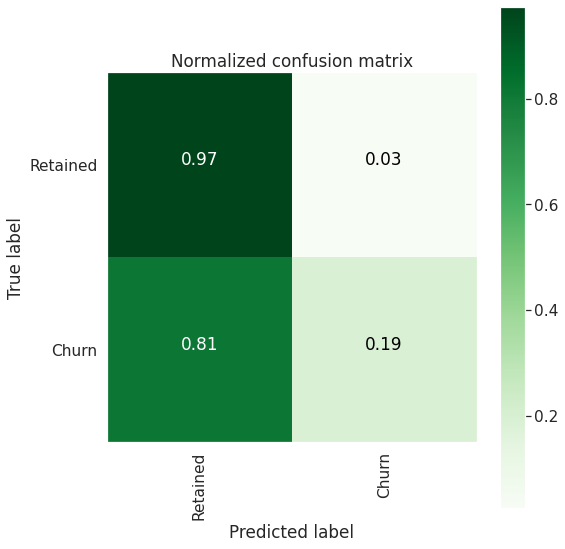

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1432
           1       0.55      0.19      0.28       240

    accuracy                           0.86      1672
   macro avg       0.71      0.58      0.60      1672
weighted avg       0.83      0.86      0.83      1672

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 0.1}

---------------------------------
|   N

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029650,0.020814,0.000000,0.000000,l1,10,"{'penalty': 'l1', 'C': 10}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.006836,0.005698,0.000000,0.000000,l1,20,"{'penalty': 'l1', 'C': 20}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,11.252002,0.010322,0.004295,0.002234,l2,0.01,"{'penalty': 'l2', 'C': 0.01}",0.853916,0.856928,0.853916,0.859729,0.855204,0.855938,0.002194,4
3,6.580543,5.212735,0.005773,0.001062,l2,30,"{'penalty': 'l2', 'C': 30}",0.865964,0.855422,0.849398,0.859729,0.862745,0.858651,0.005787,2
4,0.005700,0.000938,0.000000,0.000000,l1,0.001,"{'penalty': 'l1', 'C': 0.001}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.166842,0.035446,0.004218,0.000864,l2,10,"{'penalty': 'l2', 'C': 10}",0.862952,0.855422,0.847892,0.862745,0.859729,0.857748,0.005631,3
6,0.209004,0.056798,0.005894,0.001816,l2,0.1,"{'penalty': 'l2', 'C': 0.1}",0.873494,0.864458,0.858434,0.864253,0.856712,0.863470,0.005884,1
7,0.004682,0.001286,0.000000,0.000000,l1,0.01,"{'penalty': 'l1', 'C': 0.01}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.004630,0.001297,0.000000,0.000000,l1,30,"{'penalty': 'l1', 'C': 30}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,0.123969,0.020626,0.004783,0.000251,l2,0.001,"{'penalty': 'l2', 'C': 0.001}",0.853916,0.858434,0.850904,0.856712,0.853695,0.854732,0.002608,5


In [36]:
# start Random search
parameters = {'C':[0.01, 0.1,0.001, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_rand = RandomizedSearchCV(log_reg, param_distributions=parameters, cv=5, verbose=1, n_jobs=-1,random_state=42)
log_reg_grid_results,y_pred,y_test =  perform_model(log_reg_rand, X_train, y_train, X_test, y_test, class_labels=labels)
log_reg_grid_results["cv_result"]

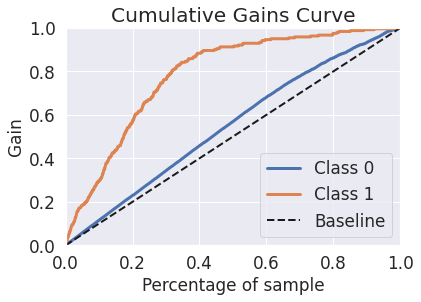

In [47]:
#ScikitPlot Metrics
import scikitplot as skplt 
model=log_reg_grid_results["model"].best_estimator_
y_proba = model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_proba)

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


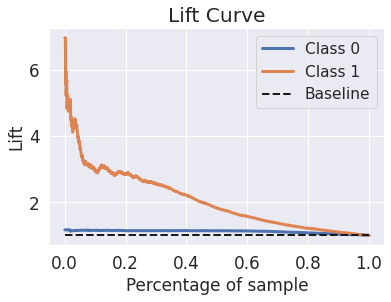

In [48]:
#ScikitPlot Metrics
import scikitplot as skplt 
model=log_reg_grid_results["model"].best_estimator_
y_proba = model.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_proba)
plt.legend(loc='upper')

In [49]:
import statsmodels.api as sm
# building the model and fitting the data 
log_reg = sm.Logit(y_train_smote, X_train_smote).fit()
# printing the summary table 
print(log_reg.summary()) 

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\numpy\linalg\linalg.py:1855: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


Optimization terminated successfully.
         Current function value: 0.527790
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5654
Model:                          Logit   Df Residuals:                     5644
Method:                           MLE   Df Model:                            9
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.2386
Time:                        13:19:14   Log-Likelihood:                -2984.1
converged:                       True   LL-Null:                       -3919.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0441      0.034      1.314      0.189      -0.022       0.110
x2             0.7307      0.

In [85]:
data.columns

Index(['state', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day charge', 'total eve charge',
       'total night charge', 'total intl calls', 'total intl charge',
       'number customer service calls', 'y'],
      dtype='object')

### It seems International Plan ,Number customer service calls ,Total day charge Are some of the most important features to detect churn customers

## Random Forest Classifier

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:01:54.375959


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.237846


---------------------
|      Accuracy      |
---------------------

    0.9539473684210527


---------------------
|      F1_score      |
---------------------

    0.8213457076566126


---------------------
|      Recall Score     |
---------------------

    0.7375




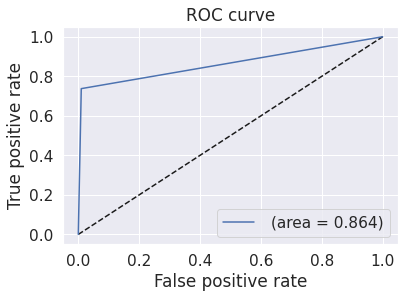

--------------------
| Confusion Matrix |
--------------------

 [[1418   14]
 [  63  177]]


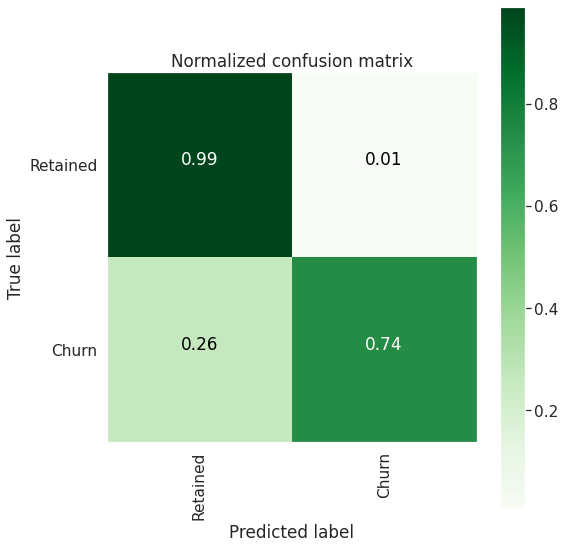

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1432
           1       0.93      0.74      0.82       240

    accuracy                           0.95      1672
   macro avg       0.94      0.86      0.90      1672
weighted avg       0.95      0.95      0.95      1672

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=311,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
       

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,19.139654,0.429501,0.669712,0.121818,944,5,4,auto,37,entropy,"{'n_estimators': 944, 'min_samples_split': 5, ...",0.942771,0.942771,0.962349,0.948718,0.954751,0.950272,0.007495,5
1,10.319723,0.953429,0.661645,0.182884,733,10,4,sqrt,8,gini,"{'n_estimators': 733, 'min_samples_split': 10,...",0.938253,0.936747,0.945783,0.944193,0.945701,0.942136,0.003857,10
2,9.015232,0.787078,0.328057,0.053095,522,10,4,sqrt,30,gini,"{'n_estimators': 522, 'min_samples_split': 10,...",0.941265,0.935241,0.954819,0.948718,0.948718,0.945752,0.006789,8
3,7.288603,1.037267,0.206643,0.029291,311,2,2,auto,30,entropy,"{'n_estimators': 311, 'min_samples_split': 2, ...",0.941265,0.944277,0.963855,0.954751,0.957768,0.952383,0.008432,1
4,20.580136,1.632411,0.762175,0.246780,944,10,4,sqrt,None,entropy,"{'n_estimators': 944, 'min_samples_split': 10,...",0.944277,0.939759,0.962349,0.948718,0.954751,0.949971,0.007929,6
5,29.291123,1.317204,0.503162,0.059574,733,2,2,None,24,gini,"{'n_estimators': 733, 'min_samples_split': 2, ...",0.944277,0.944277,0.956325,0.954751,0.951735,0.950273,0.005113,3
6,9.123295,0.935676,0.420137,0.120943,522,10,4,sqrt,27,gini,"{'n_estimators': 522, 'min_samples_split': 10,...",0.941265,0.935241,0.954819,0.948718,0.948718,0.945752,0.006789,8
7,13.248680,0.674422,0.258937,0.054768,311,2,2,None,None,gini,"{'n_estimators': 311, 'min_samples_split': 2, ...",0.942771,0.944277,0.957831,0.954751,0.951735,0.950273,0.005857,3
8,6.998251,0.766082,0.213476,0.050334,311,2,4,auto,21,entropy,"{'n_estimators': 311, 'min_samples_split': 2, ...",0.941265,0.941265,0.959337,0.948718,0.954751,0.949067,0.007206,7
9,26.372653,1.063603,0.755815,0.087391,1366,2,1,auto,50,entropy,"{'n_estimators': 1366, 'min_samples_split': 2,...",0.945783,0.941265,0.966867,0.953243,0.954751,0.952382,0.008756,2


In [37]:
from sklearn.ensemble import RandomForestClassifier
param={'n_estimators':[int(x) for x in np.linspace(start=100,stop=2000,num=10)],
                     'criterion':['gini','entropy'],
                     'max_features':['auto','sqrt',None],
                     'max_depth':[int(x) for x in np.linspace(start=5,stop=50,num=15)]+[None],
                     'min_samples_split':[2,5,10],
                     'min_samples_leaf':[1,2,4]}
rfc = RandomForestClassifier(random_state=42)
rfc_grid = RandomizedSearchCV(rfc, param_distributions=param, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
rfc_grid_results[0]["cv_result"]

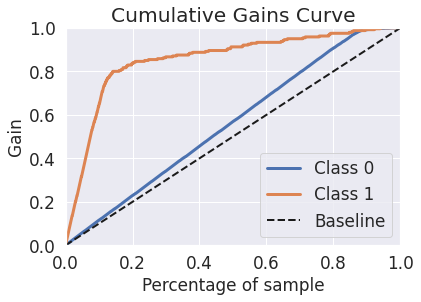

In [52]:
#ScikitPlot Metrics
import scikitplot as skplt 
model=rfc_grid_results[0]["model"].best_estimator_
y_proba = model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_proba)

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


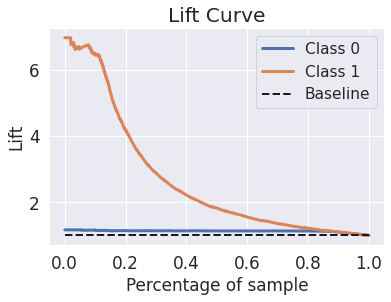

In [53]:
#ScikitPlot Metrics
import scikitplot as skplt 
model=rfc_grid_results[0]["model"].best_estimator_
y_proba = model.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_proba)
plt.legend(loc='upper')

In [56]:
model.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=37, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=311,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [57]:
model.feature_importances_

array([0.06666564, 0.11118879, 0.01967302, 0.03141137, 0.22254147,
       0.11430045, 0.07505953, 0.10113551, 0.07607547, 0.18194875])

In [60]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

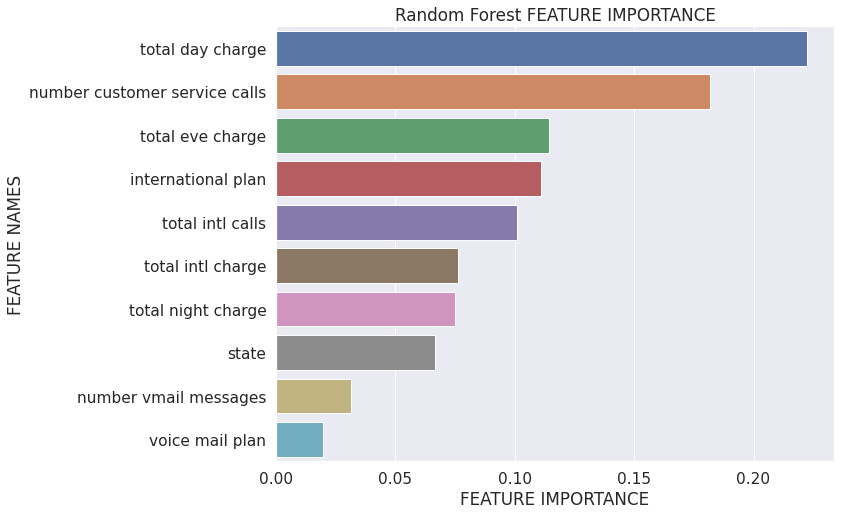

In [66]:
features=['state', 'international plan', 'voice mail plan','number vmail messages', 'total day charge', 'total eve charge',
       'total night charge', 'total intl calls', 'total intl charge','number customer service calls']
importance=model.feature_importances_
model_type="Random Forest "
plot_feature_importance(importance,features,model_type)

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.7s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:05.933994


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.003000


---------------------
|      Accuracy      |
---------------------

    0.7679425837320574


---------------------
|      F1_score      |
---------------------

    0.4974093264248705


---------------------
|      Recall Score     |
---------------------

    0.8




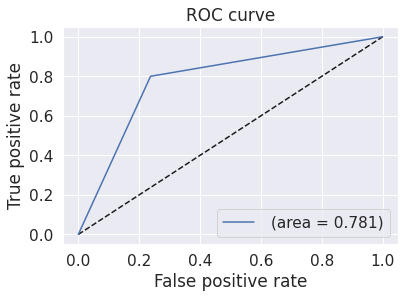

--------------------
| Confusion Matrix |
--------------------

 [[1092  340]
 [  48  192]]


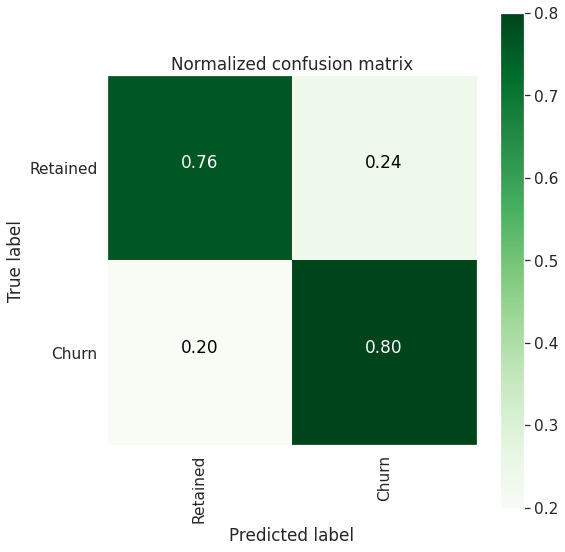

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1432
           1       0.36      0.80      0.50       240

    accuracy                           0.77      1672
   macro avg       0.66      0.78      0.67      1672
weighted avg       0.87      0.77      0.80      1672

--------------------------
|      Best Estimator     |
--------------------------

	RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'alpha': 1.0}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Sco

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.104599,0.055712,0.002002,0.000004,1,{'alpha': 1.0},0.751547,0.791335,0.793103,0.76481,0.782301,0.776619,0.016054,1
1,0.045199,0.027681,0.002002,0.000629,0.1,{'alpha': 0.1},0.751547,0.791335,0.793103,0.76481,0.782301,0.776619,0.016054,1
2,0.011399,0.001021,0.001401,0.000488,0.01,{'alpha': 0.01},0.751547,0.791335,0.793103,0.76481,0.782301,0.776619,0.016054,1
3,0.011001,0.000004,0.001599,0.000798,0.001,{'alpha': 0.001},0.751547,0.791335,0.793103,0.76481,0.782301,0.776619,0.016054,1
4,0.011195,0.000746,0.001803,0.000398,0.0001,{'alpha': 0.0001},0.751547,0.791335,0.793103,0.76481,0.782301,0.776619,0.016054,1
5,0.010998,0.000636,0.001401,0.000492,0,{'alpha': 0.0},0.751547,0.791335,0.793103,0.76481,0.782301,0.776619,0.016054,1


In [79]:
# start Random search
reg = linear_model.RidgeClassifier()
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
reg_rand = RandomizedSearchCV(reg, param_distributions=dict(alpha=alphas), cv=5, verbose=1, n_jobs=-1,random_state=42)
reg_grid_results,y_pred,y_test =  perform_model(reg_rand, X_train_smote, y_train_smote, X_test, y_test, class_labels=labels)
reg_grid_results["cv_result"]

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.7s finished
C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:28.146243


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006023


---------------------
|      Accuracy      |
---------------------

    0.7643540669856459


---------------------
|      F1_score      |
---------------------

    0.4922680412371134


---------------------
|      Recall Score     |
---------------------

    0.7958333333333333




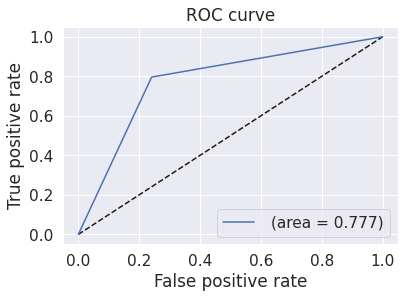

--------------------
| Confusion Matrix |
--------------------

 [[1087  345]
 [  49  191]]


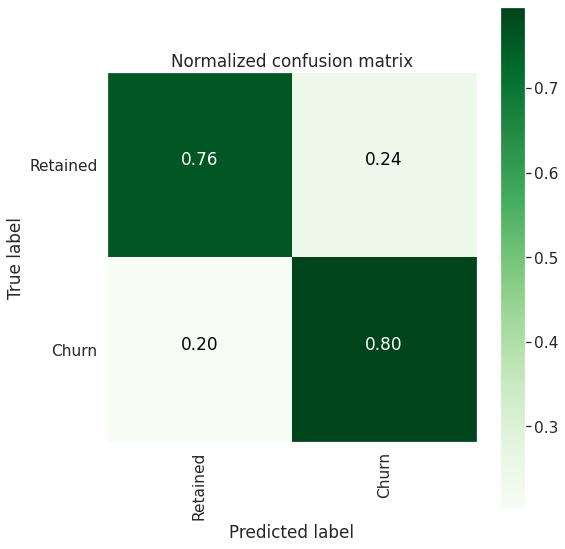

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1432
           1       0.36      0.80      0.49       240

    accuracy                           0.76      1672
   macro avg       0.66      0.78      0.67      1672
weighted avg       0.87      0.76      0.80      1672

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=8, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 8}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

-----------

In [86]:
from sklearn.svm import LinearSVC

parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = RandomizedSearchCV(lr_svc, param_distributions=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train_smote, y_train_smote, X_test, y_test, class_labels=labels)


training the model..


C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:20.875920


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.744494


---------------------
|      Accuracy      |
---------------------

    0.8516746411483254


---------------------
|      F1_score      |
---------------------

    0.16778523489932887


---------------------
|      Recall Score     |
---------------------

    0.10416666666666667




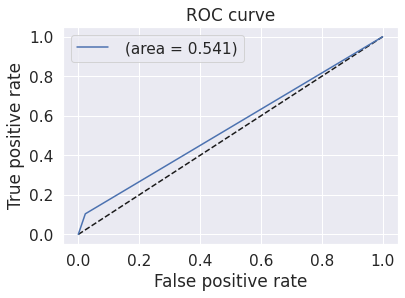

--------------------
| Confusion Matrix |
--------------------

 [[1399   33]
 [ 215   25]]


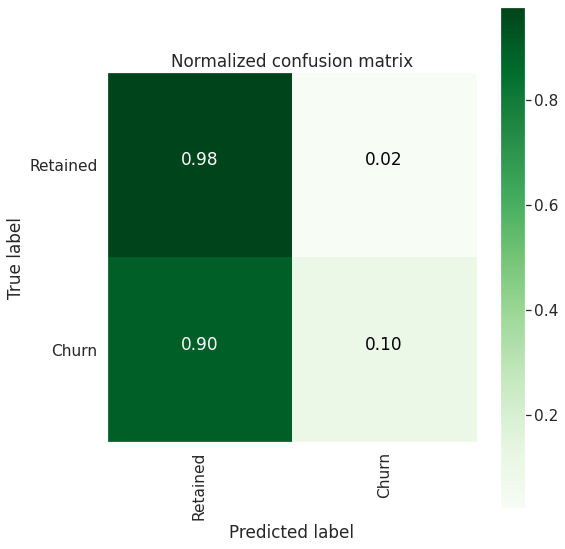

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1432
           1       0.43      0.10      0.17       240

    accuracy                           0.85      1672
   macro avg       0.65      0.54      0.54      1672
weighted avg       0.80      0.85      0.81      1672

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'gamma': 2, 'C': 8}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross vali

In [87]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = RandomizedSearchCV(rbf_svm,param_distributions=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train_smote, y_train_smote, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:57.946753


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.020614


---------------------
|      Accuracy      |
---------------------

    0.9473684210526315


---------------------
|      F1_score      |
---------------------

    0.7981651376146789


---------------------
|      Recall Score     |
---------------------

    0.725




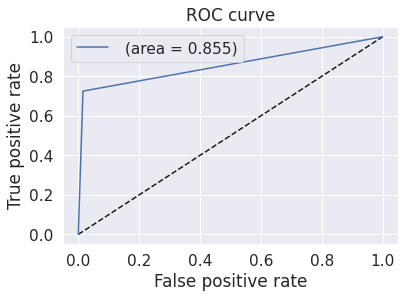

--------------------
| Confusion Matrix |
--------------------

 [[1410   22]
 [  66  174]]


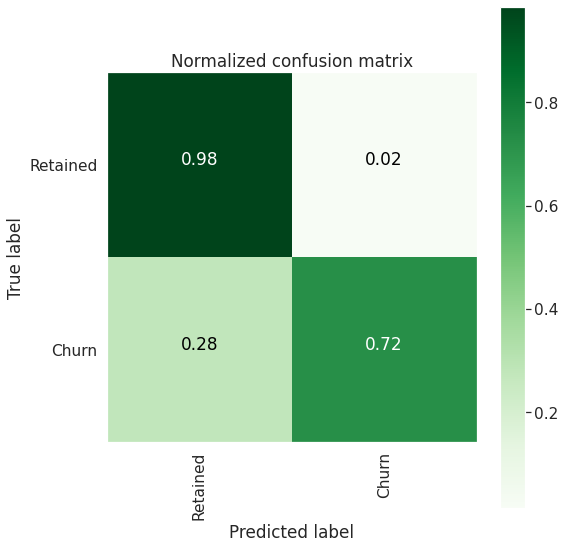

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1432
           1       0.89      0.72      0.80       240

    accuracy                           0.95      1672
   macro avg       0.92      0.85      0.88      1672
weighted avg       0.95      0.95      0.95      1672

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=160,
                           n_iter_no_change=None, presort='deprecate

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = RandomizedSearchCV(gbdt, param_distributions=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

<h2> Result <h2>

<pre>
<b>
* Here Our objective is to reduced churned customer. So we want to reduce False positive and False Negative.But more   importantly we don't want to predict customer as Retained while customer is actually Churned. So We want to reduce False Negative.Randoome forest Classifier and Gradient Boosting Classifier do this job very well
* Since This is an Imbalance Dataset F1-Score is another good metrics for mesuring different model information.These two model have good F1-score
* Total day charge , Number of Service call and International plan are three most important features we need to look upto
</b>
<pre>